In [1]:
import os
import pandas as pd
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

from ucimlrepo import fetch_ucirepo 
  
# Fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# Data (as pandas DataFrames) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# Gộp X và y để xử lý cùng nhau
data = pd.concat([X, y], axis=1)

# In số dòng ban đầu
print(f"Số dòng ban đầu: {len(data)}")

# Loại bỏ các dòng chứa giá trị thiếu (NaN)
data = data.dropna().reset_index(drop=True)

# In số dòng sau khi loại
print(f"Số dòng sau khi loại bỏ dòng có giá trị thiếu (NaN): {len(data)}")

# Cập nhật lại X và y sau khi lọc
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables)


Số dòng ban đầu: 303
Số dòng sau khi loại bỏ dòng có giá trị thiếu (NaN): 297
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of 

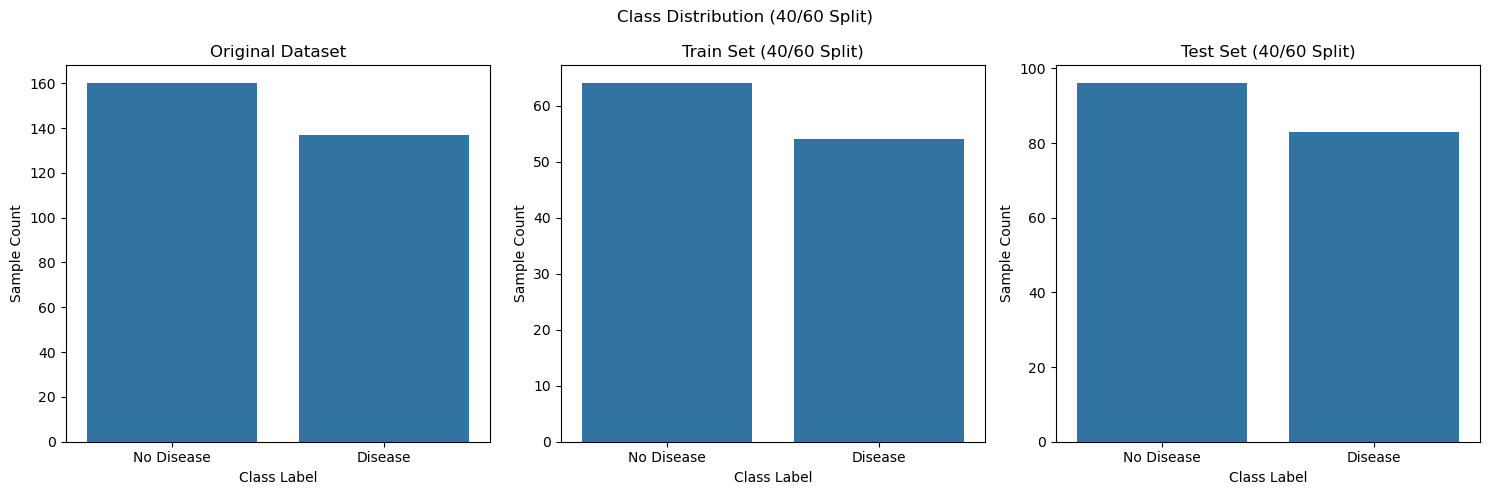

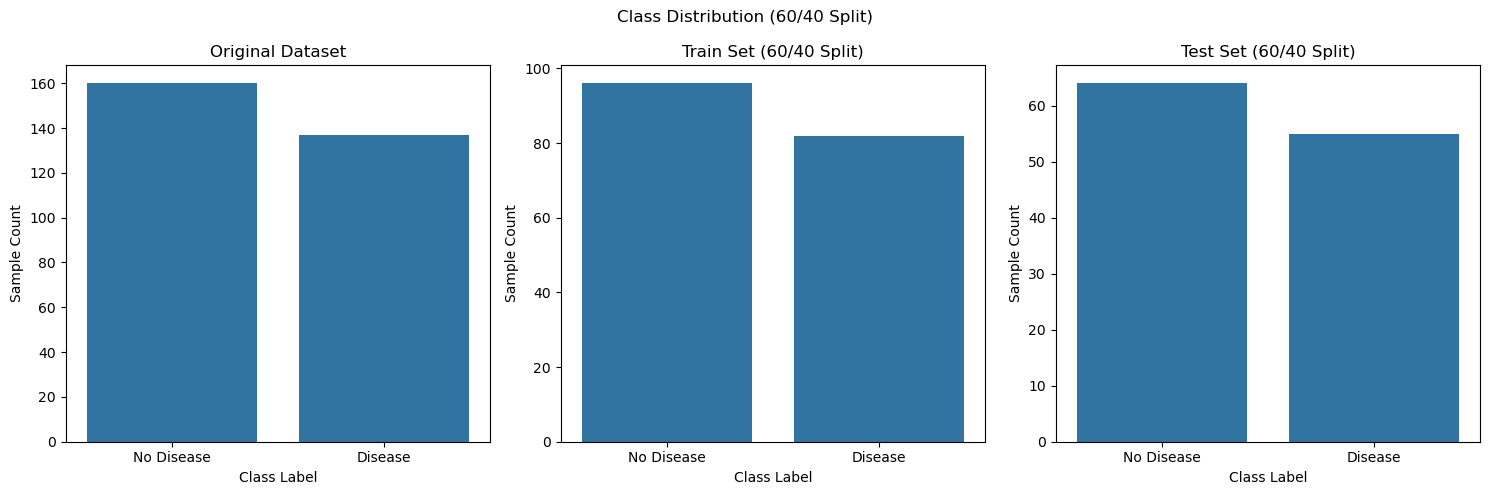

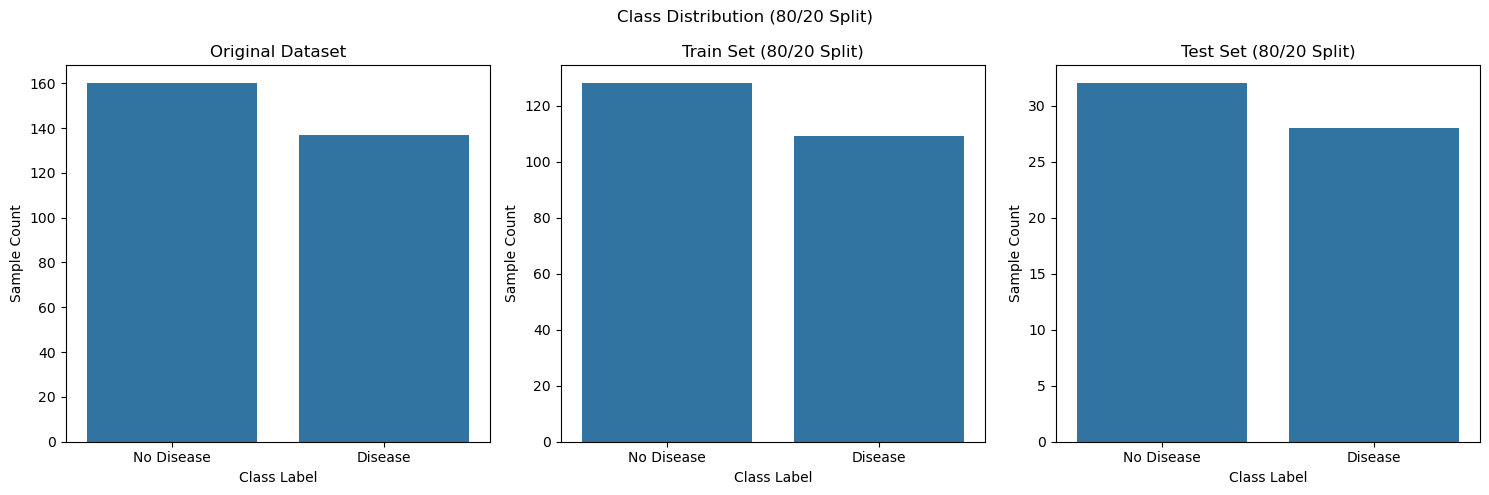

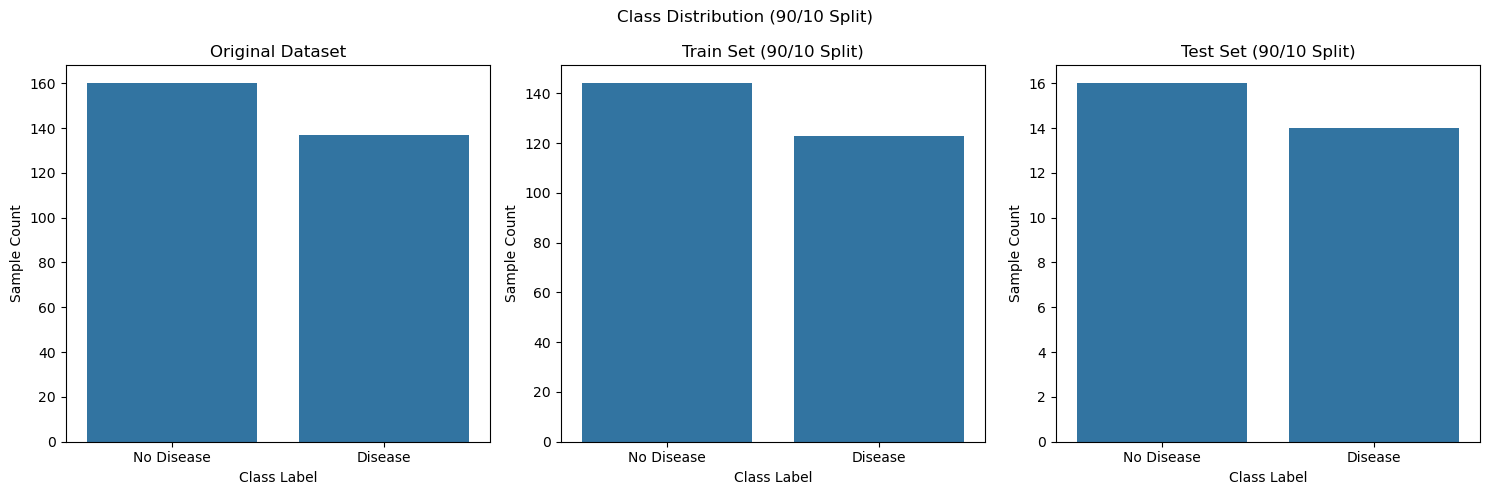

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Shuffle the data
df_shuffled = pd.concat([X, y], axis=1).sample(frac=1, random_state=0).reset_index(drop=True)
X_shuffled = df_shuffled.iloc[:, :-1]
y_shuffled = df_shuffled.iloc[:, -1]

# Ensure y is a Series
if isinstance(y_shuffled, pd.DataFrame):
    y_shuffled = y_shuffled.iloc[:, 0]

# Convert labels to strings for visualization: 0 -> "No Disease", 1 -> "Disease"
y_shuffled = y_shuffled.apply(lambda x: "No Disease" if x == 0 else "Disease")

# Define train/test split ratios
splits = {
    "40/60 Split": (0.4, 0.6),
    "60/40 Split": (0.6, 0.4),
    "80/20 Split": (0.8, 0.2),
    "90/10 Split": (0.9, 0.1)
}

# Store the 16 subsets
split_data = {}

for split_name, (train_size, test_size) in splits.items():
    # Split data with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_shuffled, y_shuffled,
        train_size=train_size,
        test_size=test_size,
        stratify=y_shuffled,  # Ensure class distribution is maintained
        random_state=0
    )

    # Store subsets
    split_data[split_name] = {
        "feature_train": X_train,
        "label_train": y_train,
        "feature_test": X_test,
        "label_test": y_test
    }

    # Convert train and test labels to strings for consistent visualization
    y_train = y_train.apply(lambda x: "No Disease" if x == "No Disease" else "Disease")
    y_test = y_test.apply(lambda x: "No Disease" if x == "No Disease" else "Disease")

    # Visualize class distribution for original, train, and test
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original dataset
    sns.countplot(x=y_shuffled, ax=axes[0], order=["No Disease", "Disease"])
    axes[0].set_title("Original Dataset")
    axes[0].set_xlabel("Class Label")
    axes[0].set_ylabel("Sample Count")
    
    # Train set
    sns.countplot(x=y_train, ax=axes[1], order=["No Disease", "Disease"])
    axes[1].set_title(f"Train Set ({split_name})")
    axes[1].set_xlabel("Class Label")
    axes[1].set_ylabel("Sample Count")
    
    # Test set
    sns.countplot(x=y_test, ax=axes[2], order=["No Disease", "Disease"])
    axes[2].set_title(f"Test Set ({split_name})")
    axes[2].set_xlabel("Class Label")
    axes[2].set_ylabel("Sample Count")
    
    plt.suptitle(f"Class Distribution ({split_name})")
    plt.tight_layout()
    plt.show()

# 2. Xây dựng cây quyết định cho từng tỷ lệ train/test
- Sử dụng DecisionTreeClassifier với criterion='entropy'
- Huấn luyện mô hình trên từng tập train
- Trực quan hóa cây bằng Graphviz


(process:17660): Pango-CRITICAL **: 23:06:35.320: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17660): Pango-CRITICAL **: 23:06:35.322: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17660): Pango-CRITICAL **: 23:06:35.322: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17660): Pango-CRITICAL **: 23:06:35.322: pango_font_description_get_family: assertion 'desc != NULL' failed


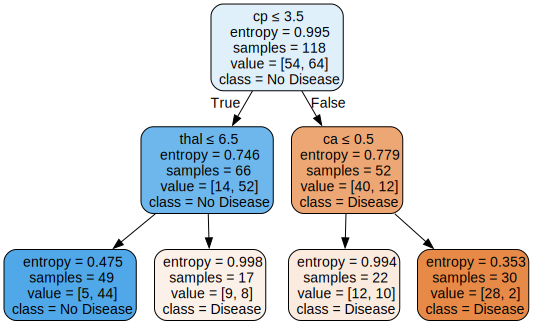


(process:20468): Pango-CRITICAL **: 23:06:36.725: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:20468): Pango-CRITICAL **: 23:06:36.725: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:20468): Pango-CRITICAL **: 23:06:36.725: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:20468): Pango-CRITICAL **: 23:06:36.725: pango_font_description_get_family: assertion 'desc != NULL' failed


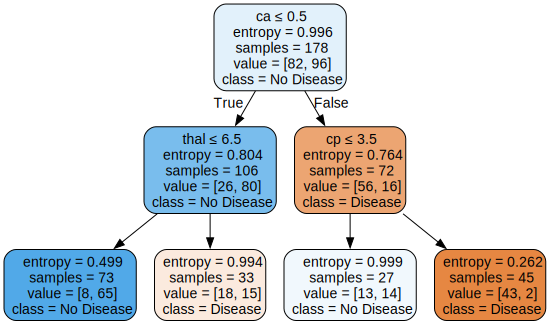


(process:12132): Pango-CRITICAL **: 23:06:37.629: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12132): Pango-CRITICAL **: 23:06:37.630: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12132): Pango-CRITICAL **: 23:06:37.630: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12132): Pango-CRITICAL **: 23:06:37.630: pango_font_description_get_family: assertion 'desc != NULL' failed


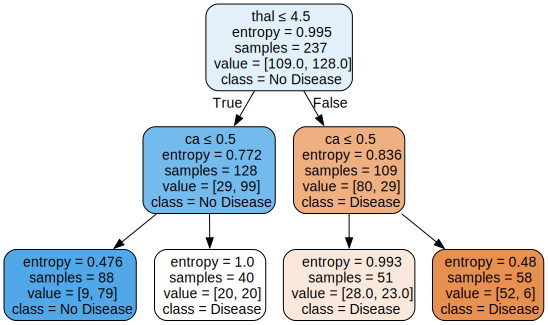


(process:15216): Pango-CRITICAL **: 23:06:38.224: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:15216): Pango-CRITICAL **: 23:06:38.224: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:15216): Pango-CRITICAL **: 23:06:38.224: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:15216): Pango-CRITICAL **: 23:06:38.224: pango_font_description_get_family: assertion 'desc != NULL' failed


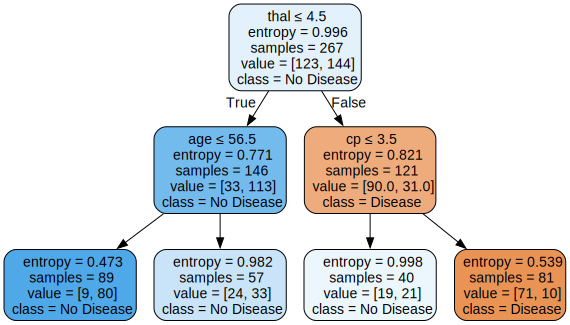

In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import numpy as np

# Train decision trees and visualize for each train/test proportion
dt_models = {}
dot_data_dict = {}

for key, data in split_data.items():
    # Fit DecisionTreeClassifier with entropy (information gain) and max_depth=2
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
    clf.fit(data["feature_train"], data["label_train"])
    dt_models[key] = clf
    
    # Export tree to DOT format
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=data["feature_train"].columns,
        class_names=[str(cls) for cls in np.unique(data["label_train"])],
        filled=True,
        rounded=True,
        special_characters=True
    )
    dot_data_dict[key] = dot_data
    
    # Visualize the tree using Graphviz
    graph = graphviz.Source(dot_data)
    display(graph)

# 3. Evaluating the decision tree classifiers

=== Đánh giá mô hình cho tỷ lệ 40/60 Split ===
Classification Report:
              precision    recall  f1-score   support

  No Disease       0.65      0.87      0.74        83
     Disease       0.84      0.59      0.70        96

    accuracy                           0.72       179
   macro avg       0.74      0.73      0.72       179
weighted avg       0.75      0.72      0.72       179



<Figure size 800x600 with 0 Axes>

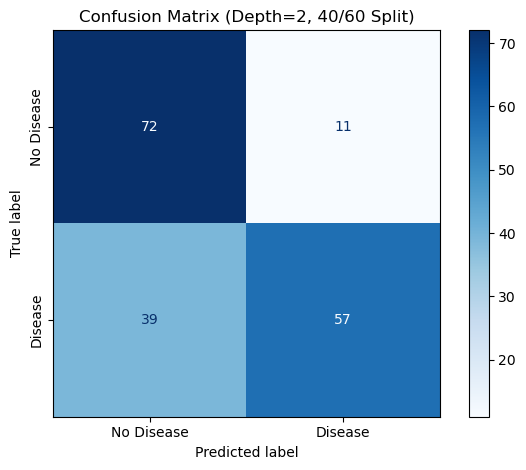

=== Đánh giá mô hình cho tỷ lệ 60/40 Split ===
Classification Report:
              precision    recall  f1-score   support

  No Disease       0.82      0.75      0.78        55
     Disease       0.80      0.86      0.83        64

    accuracy                           0.81       119
   macro avg       0.81      0.80      0.80       119
weighted avg       0.81      0.81      0.81       119



<Figure size 800x600 with 0 Axes>

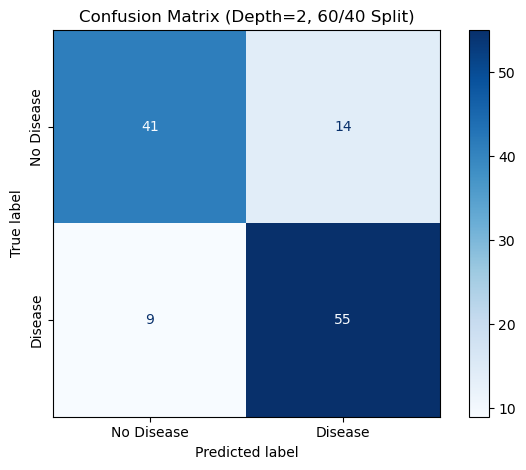

=== Đánh giá mô hình cho tỷ lệ 80/20 Split ===
Classification Report:
              precision    recall  f1-score   support

  No Disease       0.73      0.86      0.79        28
     Disease       0.85      0.72      0.78        32

    accuracy                           0.78        60
   macro avg       0.79      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60



<Figure size 800x600 with 0 Axes>

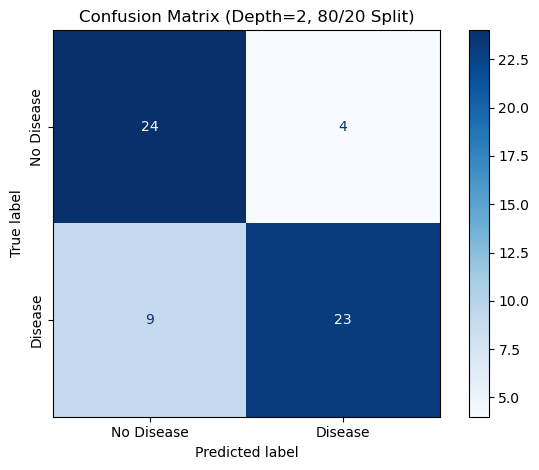

=== Đánh giá mô hình cho tỷ lệ 90/10 Split ===
Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      0.57      0.73        14
     Disease       0.73      1.00      0.84        16

    accuracy                           0.80        30
   macro avg       0.86      0.79      0.78        30
weighted avg       0.85      0.80      0.79        30



<Figure size 800x600 with 0 Axes>

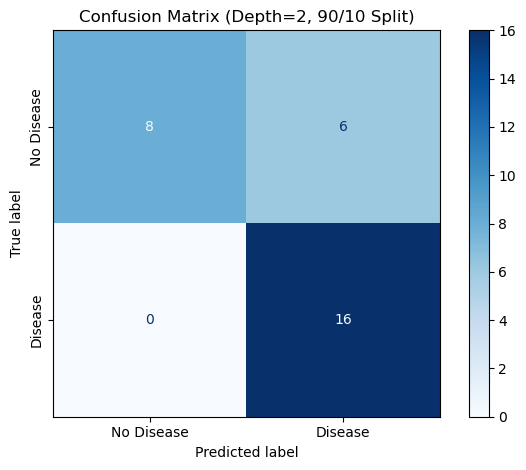

In [4]:
# --- Đánh giá mô hình và vẽ confusion matrix ---
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Đánh giá mô hình cho từng tỷ lệ train/test
for key, data in split_data.items():
    
    clf = dt_models[key]
    X_test = data["feature_test"]
    y_test = data["label_test"]
    y_pred = clf.predict(X_test)
    
    # Báo cáo phân loại
    print(f"=== Đánh giá mô hình cho tỷ lệ {key.replace('_', '/')} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))
    
    # Ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
    
    plt.figure(figsize=(8, 6))
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix (Depth={clf.get_depth()}, {key.replace('_', '/')})")
    disp.ax_.set_yticklabels(disp.ax_.get_yticklabels(), rotation=90, verticalalignment='center')
    plt.tight_layout()
    plt.show()

# 4. Ảnh hưởng của độ sâu cây quyết định đến độ chính xác (tập 80/20)
- Thử các giá trị max_depth: None, 2, 3, 4, 5, 6, 7
- Huấn luyện, vẽ cây, tính accuracy trên tập test
- Trình bày kết quả dạng bảng và biểu đồ


(process:14072): Pango-CRITICAL **: 23:06:39.427: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:14072): Pango-CRITICAL **: 23:06:39.427: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:14072): Pango-CRITICAL **: 23:06:39.427: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:14072): Pango-CRITICAL **: 23:06:39.427: pango_font_description_get_family: assertion 'desc != NULL' failed


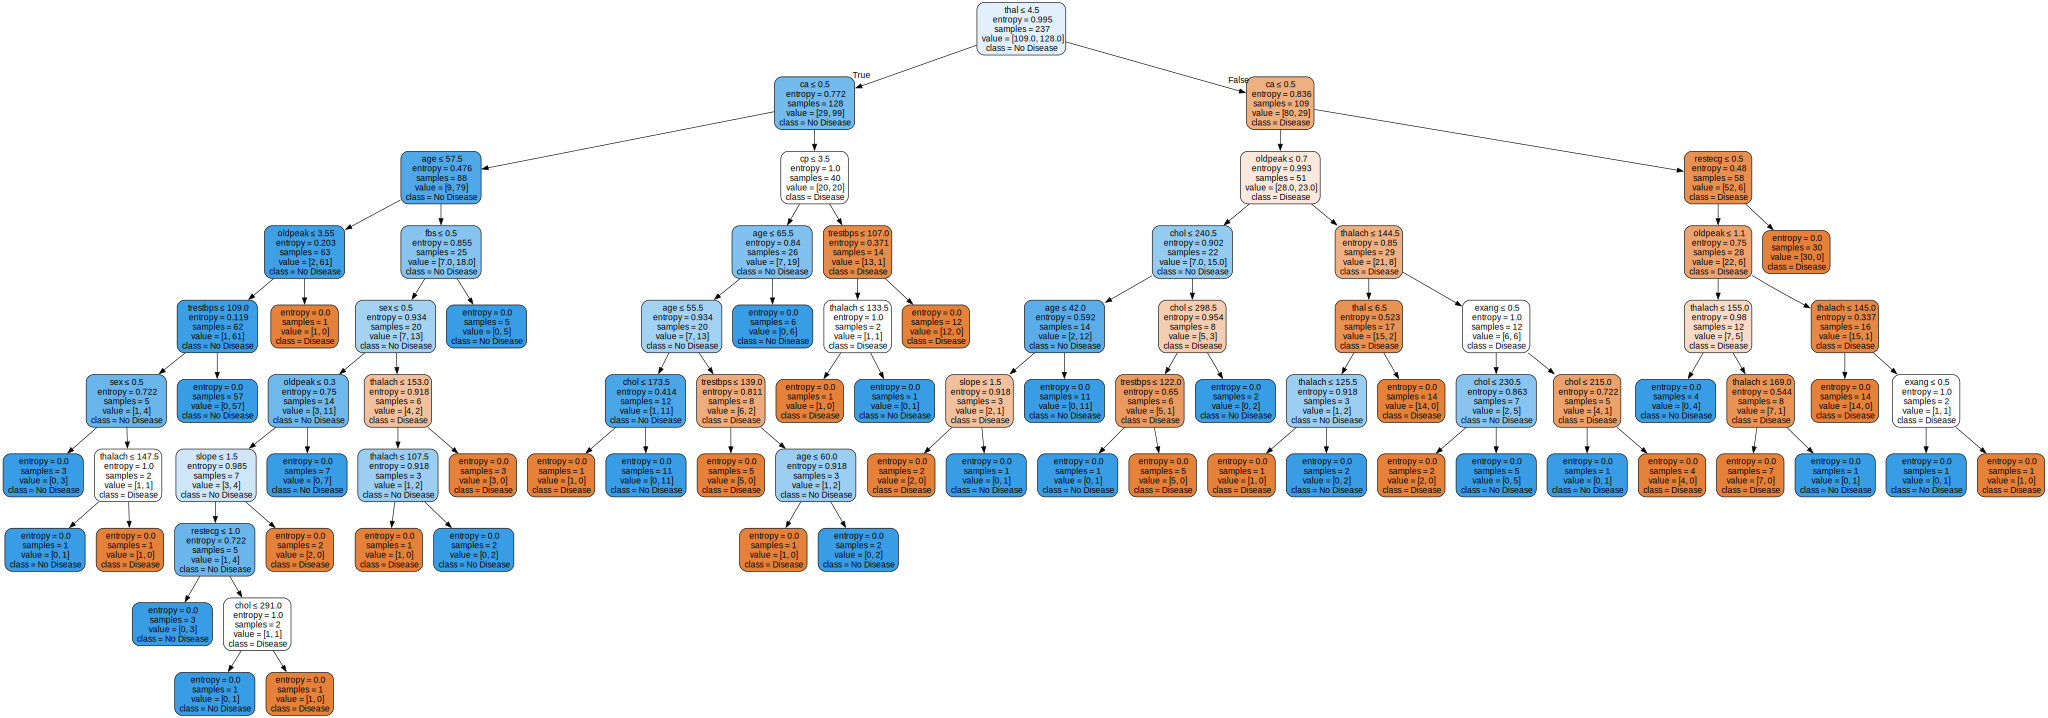


(process:3224): Pango-CRITICAL **: 23:06:40.045: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:3224): Pango-CRITICAL **: 23:06:40.045: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:3224): Pango-CRITICAL **: 23:06:40.045: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:3224): Pango-CRITICAL **: 23:06:40.045: pango_font_description_get_family: assertion 'desc != NULL' failed


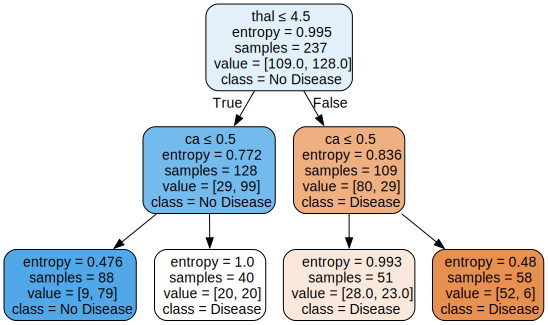


(process:22616): Pango-CRITICAL **: 23:06:40.612: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22616): Pango-CRITICAL **: 23:06:40.612: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22616): Pango-CRITICAL **: 23:06:40.612: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22616): Pango-CRITICAL **: 23:06:40.612: pango_font_description_get_family: assertion 'desc != NULL' failed


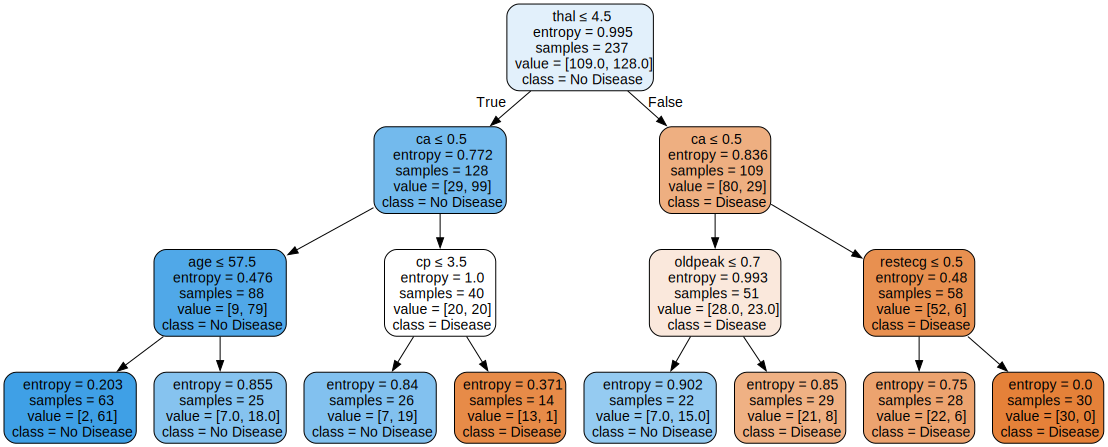


(process:15640): Pango-CRITICAL **: 23:06:41.215: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:15640): Pango-CRITICAL **: 23:06:41.215: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:15640): Pango-CRITICAL **: 23:06:41.215: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:15640): Pango-CRITICAL **: 23:06:41.215: pango_font_description_get_family: assertion 'desc != NULL' failed


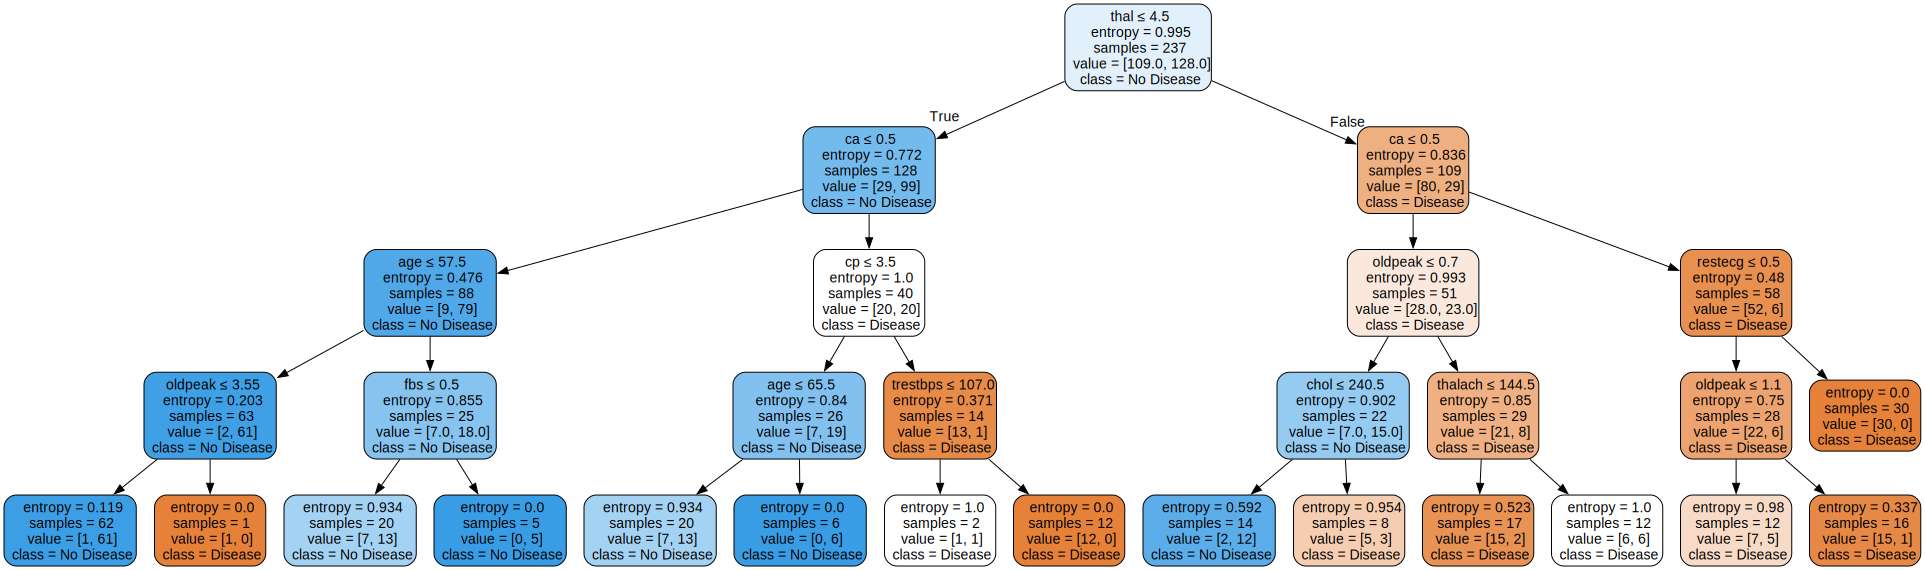


(process:12124): Pango-CRITICAL **: 23:06:41.808: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12124): Pango-CRITICAL **: 23:06:41.808: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12124): Pango-CRITICAL **: 23:06:41.808: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12124): Pango-CRITICAL **: 23:06:41.808: pango_font_description_get_family: assertion 'desc != NULL' failed


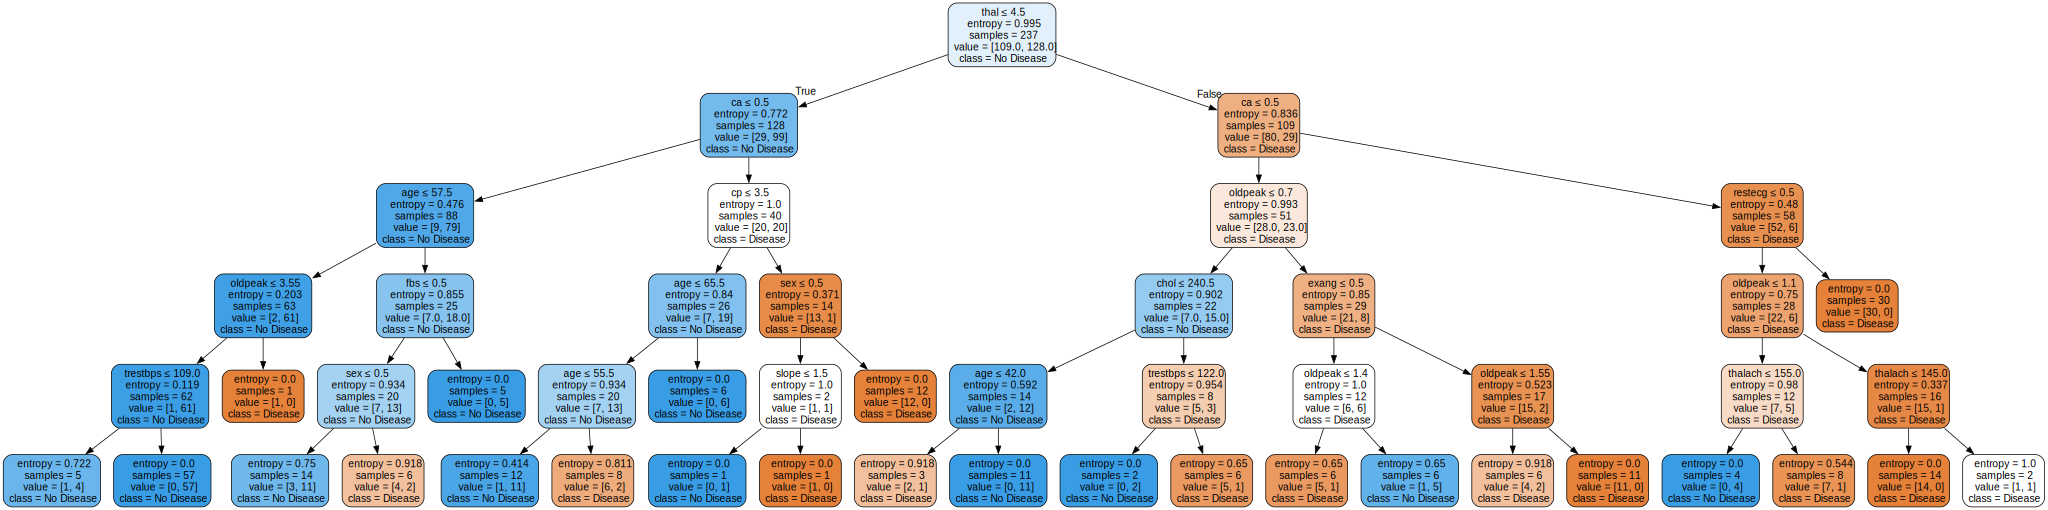


(process:22612): Pango-CRITICAL **: 23:06:42.433: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22612): Pango-CRITICAL **: 23:06:42.433: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22612): Pango-CRITICAL **: 23:06:42.433: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:22612): Pango-CRITICAL **: 23:06:42.433: pango_font_description_get_family: assertion 'desc != NULL' failed


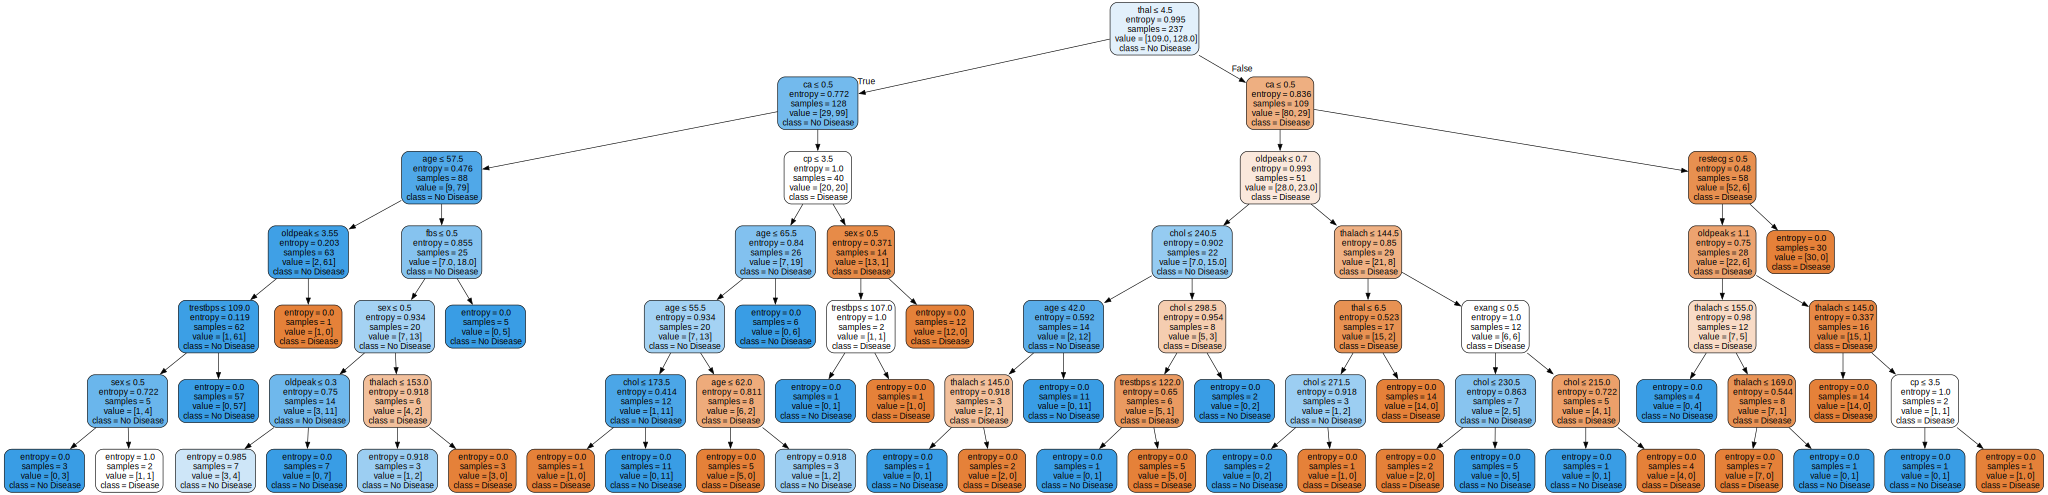


(process:3524): Pango-CRITICAL **: 23:06:43.081: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:3524): Pango-CRITICAL **: 23:06:43.082: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:3524): Pango-CRITICAL **: 23:06:43.082: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:3524): Pango-CRITICAL **: 23:06:43.082: pango_font_description_get_family: assertion 'desc != NULL' failed


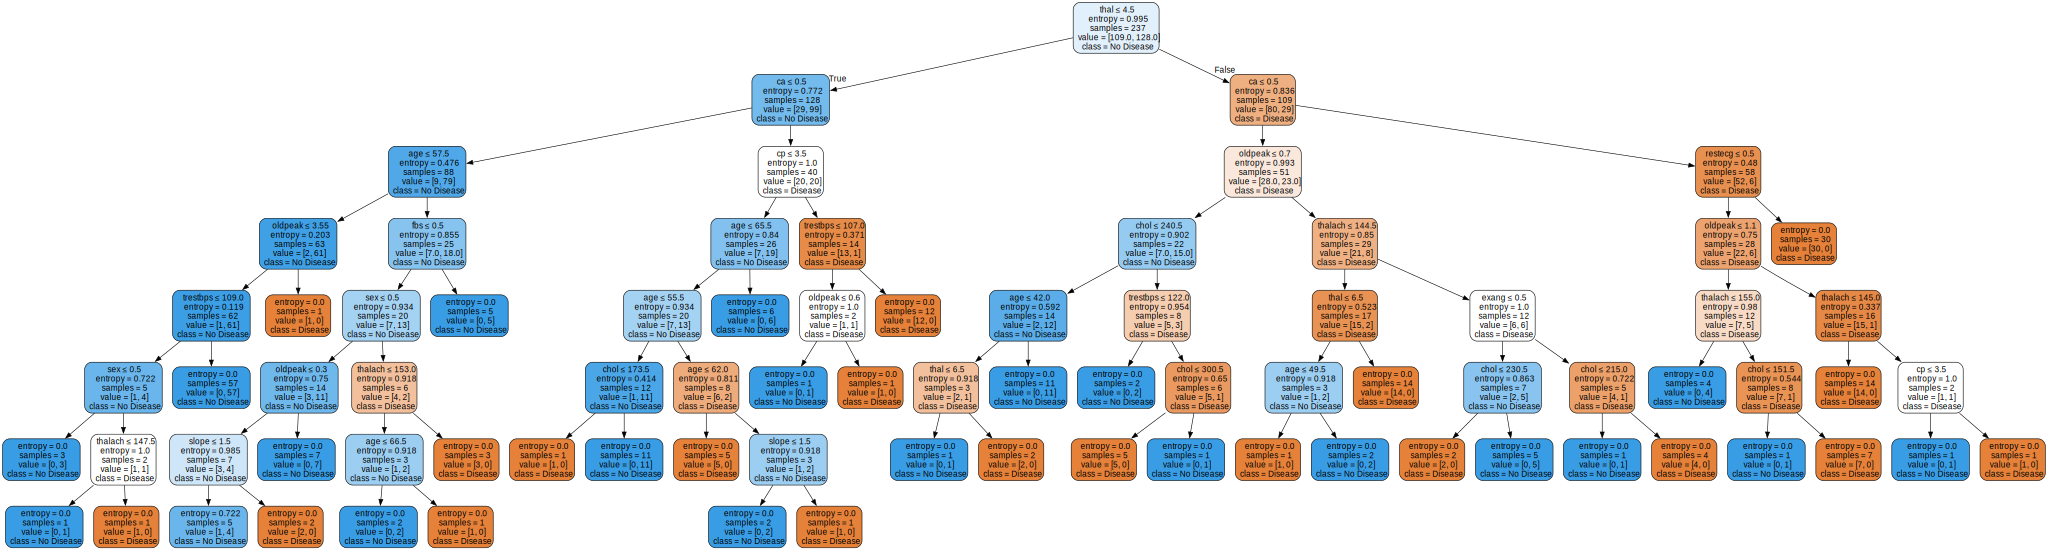

,max_depth,Accuracy
0,None,0.783333
1,2,0.783333
2,3,0.866667
3,4,0.850000
4,5,0.833333
5,6,0.766667
6,7,0.766667


In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

depths = [None, 2, 3, 4, 5, 6, 7]
accuracy_list = []
dot_data_depth = {}

X_train = split_data["80/20 Split"]["feature_train"]
y_train = split_data["80/20 Split"]["label_train"]
X_test = split_data["80/20 Split"]["feature_test"]
y_test = split_data["80/20 Split"]["label_test"]

for d in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    
    # Xuất cây ra DOT cho từng độ sâu
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=X_train.columns,
        class_names=[str(cls) for cls in np.unique(y_train)],
        filled=True, rounded=True, special_characters=True
    )
    dot_data_depth[d] = dot_data
    
    # Hiển thị cây
    graph = graphviz.Source(dot_data)
    display(graph)

# Tạo bảng kết quả
import pandas as pd
result_df = pd.DataFrame({
    "max_depth": ["None", 2, 3, 4, 5, 6, 7],
    "Accuracy": accuracy_list
})
display(result_df)

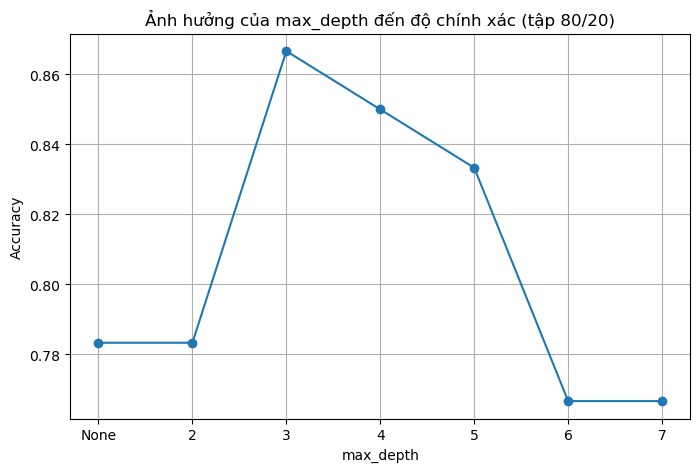

In [6]:
# Vẽ biểu đồ so sánh accuracy theo max_depth
plt.figure(figsize=(8, 5))
plt.plot(range(len(depths)), accuracy_list, marker='o')
plt.xticks(range(len(depths)), ["None", 2, 3, 4, 5, 6, 7])
plt.title("Ảnh hưởng của max_depth đến độ chính xác (tập 80/20)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

**Nhận xét:**  
- Quan sát bảng và biểu đồ trên, bạn hãy phân tích ảnh hưởng của độ sâu cây quyết định đến độ chính xác trên tập test.
- Độ sâu quá nhỏ có thể gây underfitting, quá lớn có thể gây overfitting.